In [42]:
import torch
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(10,2)
    def forward(self,input):
        return self.linear(input)
model = Model()

In [43]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [44]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer=optimizer,
    T_0=int(100*0.5),
    verbose=True,
)

Epoch     0: adjusting learning rate of group 0 to 1.0000e-01.


In [45]:
input = torch.randn(10)
step = []
learning = []
for epoch in range(100):
    optimizer.zero_grad()
    output = model(input)
    output = torch.nn.functional.softmax(output)
    loss = torch.nn.functional.cross_entropy(output.unsqueeze(0), torch.tensor([0],dtype=torch.long))
    loss.backward()
    optimizer.step()
    learning.append(scheduler.get_lr())
    step.append(epoch)
    scheduler.step()

Epoch     1: adjusting learning rate of group 0 to 9.9901e-02.
Epoch     2: adjusting learning rate of group 0 to 9.9606e-02.
Epoch     3: adjusting learning rate of group 0 to 9.9114e-02.
Epoch     4: adjusting learning rate of group 0 to 9.8429e-02.
Epoch     5: adjusting learning rate of group 0 to 9.7553e-02.
Epoch     6: adjusting learning rate of group 0 to 9.6489e-02.
Epoch     7: adjusting learning rate of group 0 to 9.5241e-02.
Epoch     8: adjusting learning rate of group 0 to 9.3815e-02.
Epoch     9: adjusting learning rate of group 0 to 9.2216e-02.
Epoch    10: adjusting learning rate of group 0 to 9.0451e-02.
Epoch    11: adjusting learning rate of group 0 to 8.8526e-02.
Epoch    12: adjusting learning rate of group 0 to 8.6448e-02.
Epoch    13: adjusting learning rate of group 0 to 8.4227e-02.
Epoch    14: adjusting learning rate of group 0 to 8.1871e-02.
Epoch    15: adjusting learning rate of group 0 to 7.9389e-02.
Epoch    16: adjusting learning rate of group 0 to 7.67

/var/folders/00/23jdv6w52bb7gjdhjk737k6w0000gn/T/ipykernel_12221/2184996239.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(output)


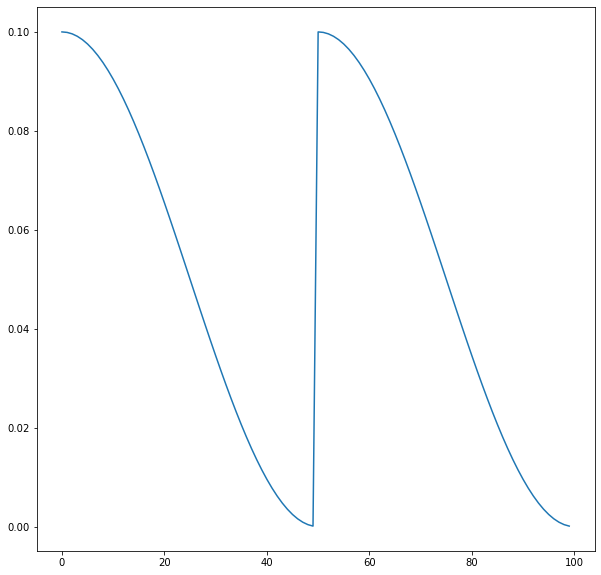

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.plot(step, learning)
plt.show()

In [47]:
import math
from torch.optim.lr_scheduler import LambdaLR
def get_cosine_schedule_with_warmup(optimizer,
                                    num_warmup_steps,
                                    num_training_steps,
                                    num_wait_steps=0,
                                    num_cycles=0.5,
                                    last_epoch=-1):
    def lr_lambda(current_step):
        if current_step < num_wait_steps:
            return 0.0

        if current_step < num_warmup_steps + num_wait_steps:
            return float(current_step) / float(max(1, num_warmup_steps + num_wait_steps))

        progress = float(current_step - num_warmup_steps - num_wait_steps) / \
            float(max(1, num_training_steps - num_warmup_steps - num_wait_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))

    return LambdaLR(optimizer, lr_lambda, last_epoch)

In [48]:
input = torch.randn(10)
step = []
learning = []
scheduler_t = get_cosine_schedule_with_warmup(optimizer=optimizer, num_warmup_steps=0, num_training_steps=50)
for epoch in range(100):
    optimizer.zero_grad()
    output = model(input)
    output = torch.nn.functional.softmax(output)
    loss = torch.nn.functional.cross_entropy(output.unsqueeze(0), torch.tensor([0],dtype=torch.long))
    loss.backward()
    optimizer.step()
    learning.append(scheduler_t.get_lr())
    step.append(epoch)
    scheduler_t.step()

/var/folders/00/23jdv6w52bb7gjdhjk737k6w0000gn/T/ipykernel_12221/3938559269.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = torch.nn.functional.softmax(output)


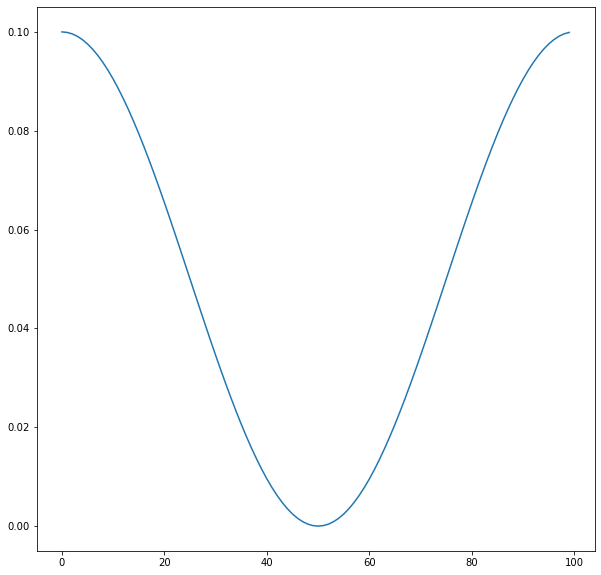

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.plot(step, learning)
plt.show()